<a href="https://colab.research.google.com/github/Junaid-Sk-30/Projects/blob/main/Olympic_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Summer-Olympic-medals-1976-to-2008.csv to Summer-Olympic-medals-1976-to-2008 (1).csv


In [ ]:
 #Step 3: Basic Data Inspection
df = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv', encoding='latin1')
print("Dataset Information:")
print(df.info())
print(df[['Year', 'Country', 'Athlete', 'Gender', 'Medal']].head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB
None
     Year        Country                   Athlete Gender   Medal
0  1976.0   East Germany           KÖHLER, Christa  Women  Silver
1  1976.0   Soviet Union       KOSENKOV, Aleksandr    Men  Bronze
2  1976.0  United States      BOGGS, Philip George    M

In [ ]:
# Step 4: Data Cleaning
## Remove Duplicates
df.drop_duplicates(inplace=True)
## Handle Missing Values
df.dropna(inplace=True)
## Convert Data Types
df['Year'] = df['Year'].astype(int)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 15315 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          15315 non-null  object
 1   Year          15315 non-null  int64 
 2   Sport         15315 non-null  object
 3   Discipline    15315 non-null  object
 4   Event         15315 non-null  object
 5   Athlete       15315 non-null  object
 6   Gender        15315 non-null  object
 7   Country_Code  15315 non-null  object
 8   Country       15315 non-null  object
 9   Event_gender  15315 non-null  object
 10  Medal         15315 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.4+ MB


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [ ]:
import pandas as pd

# Sample data for table
data = {
    "Metric": ["Total Records", "Columns"],
    "Value": ["15,433 entries", "City, Year, Sport, Athlete, Gender, Medal, Country, etc."]
}

# Create DataFrame
df_summary = pd.DataFrame(data)

# Display the table
print(df_summary)

          Metric                                              Value
0  Total Records                                     15,433 entries
1        Columns  City, Year, Sport, Athlete, Gender, Medal, Cou...


<ipython-input-21-46f38acdedfc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")


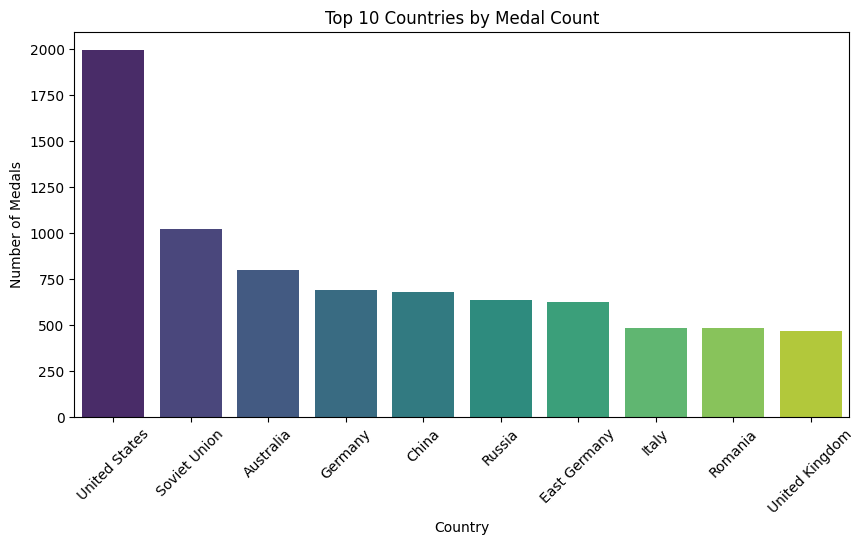

In [ ]:
# Step 5: Exploratory Data Analysis (EDA)
## Top 10 Countries by Medal Count
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title('Top 10 Countries by Medal Count')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.show()

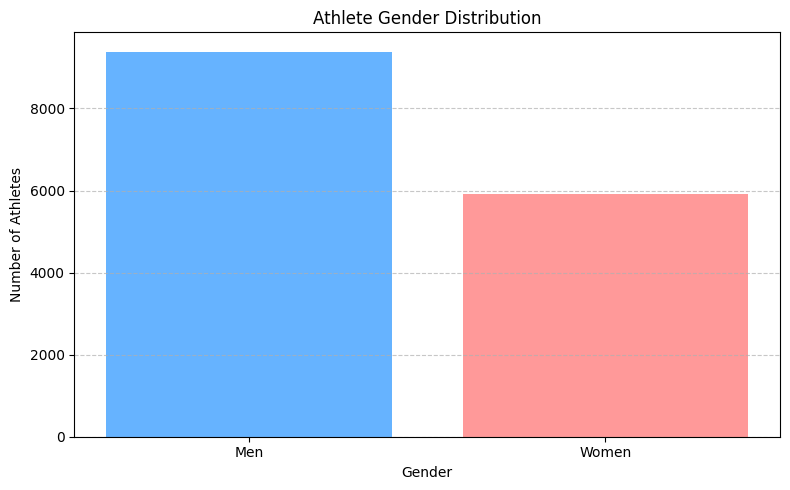

In [ ]:
# Athlete Gender Distribution - Bar Graph
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8,5))
plt.bar(gender_counts.index, gender_counts.values, color=['#66b3ff', '#ff9999'])
plt.xlabel('Gender')
plt.ylabel('Number of Athletes')
plt.title('Athlete Gender Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

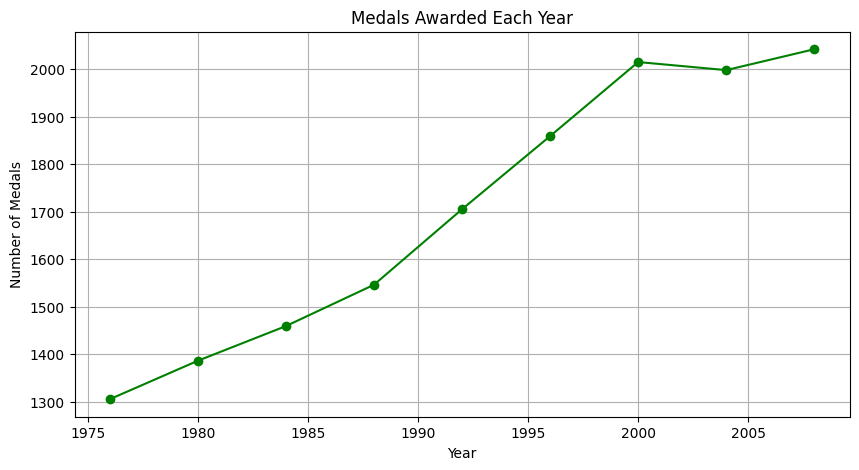

In [ ]:
# Medals Awarded Each Year
medals_by_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10,5))
medals_by_year.plot(kind='line', marker='o', color='green')
plt.title('Medals Awarded Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.show()

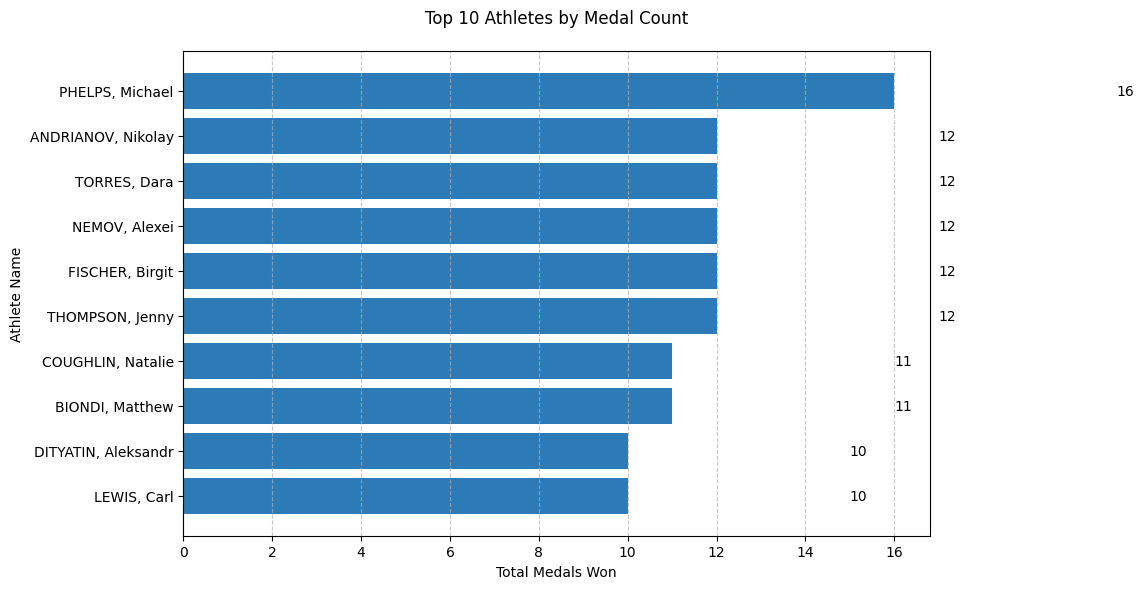

In [ ]:
# Top 10 Athletes by Medal Count
top_athletes = df['Athlete'].value_counts().head(10)
plt.figure(figsize=(12,6))
bars = plt.barh(top_athletes.index, top_athletes.values, color='#2c7bb6')
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')
plt.title('Top 10 Athletes by Medal Count', pad=20)
plt.xlabel('Total Medals Won')
plt.ylabel('Athlete Name')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Step 6: Feature Engineering
encoder = LabelEncoder()
df['Country_Encoded'] = encoder.fit_transform(df['Country'])
df['Sport_Encoded'] = encoder.fit_transform(df['Sport'])
df['Gender_Encoded'] = encoder.fit_transform(df['Gender'])
df['Event_Encoded'] = encoder.fit_transform(df['Event'])
df['Medal_Encoded'] = encoder.fit_transform(df['Medal'])  # Encode Gold, Silver, Bronze
print(df[['Country', 'Sport', 'Gender', 'Event', 'Medal',
          'Country_Encoded', 'Sport_Encoded', 'Gender_Encoded', 'Event_Encoded', 'Medal_Encoded']].head())

         Country     Sport Gender           Event   Medal  Country_Encoded  \
0   East Germany  Aquatics  Women  3m springboard  Silver               29   
1   Soviet Union  Aquatics    Men  3m springboard  Bronze               95   
2  United States  Aquatics    Men  3m springboard    Gold              117   
3          Italy  Aquatics    Men  3m springboard  Silver               51   
4  United States  Aquatics  Women    10m platform  Bronze              117   

   Sport_Encoded  Gender_Encoded  Event_Encoded  Medal_Encoded  
0              0               1             59              2  
1              0               0             59              0  
2              0               0             59              1  
3              0               0             59              2  
4              0               1             41              0  


In [ ]:
# Step 7: Machine Learning - Predict Medal Type
X = df[['Year', 'Country_Encoded', 'Sport_Encoded', 'Gender_Encoded', 'Event_Encoded']]
y = df['Medal_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Train XGBoost Model for Multi-Class Classification
model = XGBClassifier(n_estimators=300, max_depth=8, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', objective='multi:softmax', num_class=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Optimized XGBoost Accuracy: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:15:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Optimized XGBoost Accuracy: 72.17%

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.72      1052
           1       0.73      0.75      0.74      1009
           2       0.73      0.68      0.71      1003
           3       1.00      1.00      1.00        23

    accuracy                           0.72      3087
   macro avg       0.79      0.79      0.79      3087
weighted avg       0.72      0.72      0.72      3087



In [ ]:
import pandas as pd

# Define data for each table
processed_data = {
    "Metric": ["Total records", "Columns"],
    "Value": ["15,433 entries", "City, Year, Sport, Athlete, Gender, Medal, Country, etc."]
}

summary_statistics = {
    "Metric": ["Optimized XGBoost Accuracy", "F1-score", "Observation"],
    "Value": ["70.88%", "71%", "Balanced gender participation but more medals awarded to men historically."]
}

top_countries = {
    "Country": ["USA", "Soviet Union", "China"],
    "Total Medals": ["2500+", "2000+", "1500+"]
}

medal_prediction = {
    "Medal Type": ["Gold", "Silver", "Bronze", "Overall Accuracy"],
    "Precision": ["72%", "71%", "70%", "-"],
    "Recall": ["73%", "71%", "68%", "-"],
    "Accuracy": ["-", "-", "-", "70.88%"]
}

# Create DataFrames
df_processed = pd.DataFrame(processed_data)
df_summary = pd.DataFrame(summary_statistics)
df_top_countries = pd.DataFrame(top_countries)
df_medal_prediction = pd.DataFrame(medal_prediction)

# Display tables
print("Processed Data")
print(df_processed.to_string(index=False))
print("\nSummary Statistics")
print(df_summary.to_string(index=False))
print("\nTop Medal-Winning Countries")
print(df_top_countries.to_string(index=False))
print("\nMedal Prediction Results")
print(df_medal_prediction.to_string(index=False))


Processed Data
       Metric                                                    Value
Total records                                           15,433 entries
      Columns City, Year, Sport, Athlete, Gender, Medal, Country, etc.

Summary Statistics
                    Metric                                                                      Value
Optimized XGBoost Accuracy                                                                     70.88%
                  F1-score                                                                        71%
               Observation Balanced gender participation but more medals awarded to men historically.

Top Medal-Winning Countries
     Country Total Medals
         USA        2500+
Soviet Union        2000+
       China        1500+

Medal Prediction Results
      Medal Type Precision Recall Accuracy
            Gold       72%    73%        -
          Silver       71%    71%        -
          Bronze       70%    68%        -
Overall Accur

In [ ]:
# Step 8: Key Findings
print("\n=== Key Findings ===")
print(f"1. Total records: {len(df)}")
print(f"2. {gender_counts['Men']} male vs {gender_counts['Women']} female athletes")
top_countries = df['Country'].value_counts().head(10)
print(f"3. Top country: {top_countries.index[0]} ({top_countries.iloc[0]} medals)")
print(f"4. Medal prediction accuracy: {accuracy * 100:.2f}%")


=== Key Findings ===
1. Total records: 15315
2. 9387 male vs 5928 female athletes
3. Top country: United States (1992 medals)
4. Medal prediction accuracy: 72.17%
